# Exploration of Media Usage and Mental Health during COVID-19

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Video Presentation

https://youtu.be/t1rOF2Pru3g

# Overview

For this project, we explored the relationship between media usage (i.e. social media hours daily and TV hours daily) and mental health as well as their interactions with demographic information like age, gender, habitat, qualification, and the attitudes toward social media. To accomplish this, we explored the dataset with 426 respondents from India from Bankura University. We analyzed the data by using t-tests, the Mann-Whitney U test, linear regression and multi-linear regression. Based on the analysis, we concluded that higher media usage was correlated with higher anxiety level and poorer mental health mediated by age, gender, habitat and distrust of social media news.

# Names

- Changchen Liu
- Jason Hsu
- Sanjay Sampat
- Victor Chang
- Yu Xie

<a id='research_question'></a>
# Research Question

In a group of participants in India three weeks after a nation-wide COVID lockdown, was there a relationship between their media usage (social media and TV) time per day and their scores on both a mental well-being and anxiety questionnaire (Warwick-Edinburgh Mental Well-Being Scale and Beck's Anxiety Inventory)?

<a id='background'></a>

## Background & Prior Work

 In the past decade, the use of social media has majorly changed the way we communicate and exchange information on a daily basis. The convenient ability for these expansive platforms to share experiences, gather thoughts/opinions, provide information on worldwide events, and raise awareness for certain issues has lended them a user base of over 3.6 billion people worldwide, each spending an average of 145 minutes per day, with growing projections for the years to come (Statistica, 2020). A recent contributing factor to the popularity of social media was the onset of the COVID-19 pandemic. With unprecedented restrictions placed on in-person social interactions, social media engagement saw a 61% global increase during the first waves of lockdown. It is often believed that social media has an effect of increasing feelings of inadequacy, dissatisfaction, and isolation. This indirectly leads to feelings that negatively affect mood, increasing the chances of developing depression, stress, and anxiety. Not everyone agrees, however, that the increased screen time during the pandemic is indicative of an increased population of people with poor mental health (which has been the typical trend pre-COVID). With the pandemic’s special circumstances of physical distancing, some literature has suggested that social media usage may have an overall positive effect in helping people stay connected and entertained (Penn Medicine, 2021). Researchers have also found that social media acts as a buffer to deal with anxiety associated with the pandemic (Nature, 2021).

With these perspectives and ideas in mind, we decided to use data from a research study conducted by Bankura University in India to determine the effects of social media usage (screen time in hours) on mental health and anxiety scores during the pandemic.


References (include links):
- 1) Statista Research Department. (2021). Number of global social network users 2017-2025. Statistica. https://www.statista.com/statistics/278414/number-of-worldwide-social-network-users/
- 2) Fullerton, N. (2021). Instagram vs. Reality: The Pandemic’s Impact on Social Media and Mental Health. Penn Medicine News. https://www.pennmedicine.org/news/news-blog/2021/april/instagram-vs-reality-the-pandemics-impact-on-social-media-and-mental-health
- 3) Marzouki, Y., Aldossari, F. S., Veltri, G. A. (2021). Understanding the buffering effect of social media use on anxiety during the COVID-19 pandemic lockdown. Humanities and Social Sciences Communications 8, 47. https://doi.org/10.1057/s41599-021-00724-x

# Hypothesis


While there is typically a negative relationship between social media usage and mental health, it is possible that social media use to keep in touch with friends and family during COVID lockdowns improves mental health. Therefore, we think that higher levels of social media usage during COVID lockdowns actually improved mental health.

# Dataset(s)

- **Dataset Name:** Media Use Pattern with Respect to Mental Health in COVID-19: A Dataset from India
- **Link to the dataset:** https://data.mendeley.com/datasets/sktz4xv4vh/4/files/57ab961c-74bf-4853-83d0-de2f8d8622d8
- **Number of observations:** 426
- **Dataset description:**

The data in the dataset was gathered after three weeks of commencement of lockdown (due to COVID) in India from 426 respondents through snowball sampling. It includes demographic variables of the respondents, amount of time spent on social media per day, as well as questions taken from the Warwick-Edinburgh Mental Well-Being Scale (WEMWBS) and Beck's Anxiety Inventory (BAI).

The WEMWBS contains 14 questions, all weighted equally and scored on a 5-point Likert Scale. These questions aim to collect information about an individual’s well-being and can be converted into numeric values to be summated for a maximum possible score of 70. A higher WEMWBS score typically indicates better mental well-being and vice-versa. The numerically-converted WEMWBS Likert scale is as follows on the official scoring chart:
- *None of the time:* 1
- *Rarely:* 2
- *Some of the time:* 3
- *Often:* 4
- *All of the time:* 5

The BAI contains 21 questions, all weighted equally and scored on a 4-point Likert scale. These questions aim to collect information about an individual’s mental anxiety and can be converted into numeric values to be summated for a maximum possible score of 63. A higher BAI score typically indicates a higher level of anxiety and vice-versa. The numerically-converted BAI Likert scale is as follows on the official scoring chart:
- *Not at all:* 0
- *Mildly* - but it did not bother me much: 1
- *Moderately* - it was not pleasant at the time: 2
- *Severely* - it bothered me a lot: 3


# Setup

In [1]:
# Import Libaries
import pandas as pd
import numpy as np
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt

import warnings

In [2]:
# Supress warning to make notebook cleaner (After finishing coding)
warnings.simplefilter(action='ignore', category=pd.core.common.SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
# Set up table viewing preference
pd.set_option('display.max_columns', 50)

# Set up preferred data visualization settings
sns.set_style("darkgrid", {"axes.facecolor": "0.8"})
sns.set(font_scale = 1.2)

In [4]:
# import data
df = pd.read_csv('data_set.csv')
df

,Age,Sex:,Qualifications,Habitat,Unnamed: 4,1. How many hours a day do you spend on Social Media?,2. How many hours a day do you spend on watching news in TV?,3. Which media you rely most for authentic news or information?,4. What media according to you is most dependable in the time of crisis caused by Covid-19?,"5. Through which media you keep yourself updated most, about ongoing Pandemic Crisis of COVID-19?",6. Do you think that social media spread more fake news than real information?,7. Do you try always to verify the fact that came into your notice through Social media?,8. Did you post anything on Social media related to Covid-19 without verifying the facts?,9. Do you search the website of WHO & ICMR for understanding and maintaining Covid-19 related Hygiene?,"10. Do you think that despite some negative implications, Social Media Played a significant role in the time of crisis caused by Covid-19?",Unnamed: 15,1. I’ve been feeling optimistic about the future,2. I’ve been feeling useful,3. I’ve been feeling relaxed,4. I’ve been feeling interested in other people,5. I’ve had energy to spare,6. I’ve been dealing with problems well,7. I’ve been thinking clearly,8. I’ve been feeling good about myself,9 . I’ve been feeling close to other people,...,12. I’ve been feeling loved,13. I’ve been interested in new things,14 .I’ve been feeling cheerful,Unnamed: 30,1. Numbness or Tingling,2. Feeling hot,3. Wobbliness in legs,4. Unable to relax,5. Fear of worst happening,6. Dizzy or lightheaded,7. Heart pounding / racing,8. Unsteady,9. Terrified or afraid,10. Nervous,11. Feeling of choking,12. Hands trembling,13. Shaky / unsteady,14. Fear of losing control,15. Difficulty in breathing,16. Fear of dying,17. Scared,18. Indigestion,19. Faint / lightheaded,20. Face flushed,21. Hot / cold sweats
0,30,Female,PG,Urban Municipal Area,NaN,9,1,TV,TV,TV,No,Mostly,No,No,Yes,NaN,Some of the time,All of the time,Some of the time,Often,Often,Often,Some of the time,Often,Often,...,All of the time,Often,Often,NaN,Not at all,Moderately -it was not pleasant at time.,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Mildly But it did not bother me much,Not at all,Not at all,Not at all,Not at all,Mildly But it did not bother me much,Not at all,Not at all,Not at all,Moderately -it was not pleasant at time.,Not at all,Mildly But it did not bother me much,Moderately -it was not pleasant at time.
1,27,Male,PG,Urban Municipal Area,NaN,6,2,Daily News Paper,Daily News Paper,TV,No,Mostly,No,Yes,Yes,NaN,Some of the time,Often,Some of the time,Often,Rarely,Often,Often,Some of the time,Some of the time,...,Often,Some of the time,Often,NaN,Mildly But it did not bother me much,Mildly But it did not bother me much,Not at all,Mildly But it did not bother me much,Not at all,Moderately -it was not pleasant at time.,Mildly But it did not bother me much,Not at all,Mildly But it did not bother me much,Mildly But it did not bother me much,Mildly But it did not bother me much,Not at all,Mildly But it did not bother me much,Mildly But it did not bother me much,Not at all,Moderately -it was not pleasant at time.,Mildly But it did not bother me much,Mildly But it did not bother me much,Mildly But it did not bother me much,Not at all,Mildly But it did not bother me much
2,25,Male,PG,Urban Municipal Area,NaN,9,2,TV,TV,TV,Yes,Never,No,Yes,Yes,NaN,All of the time,Rarely,Rarely,Some of the time,Often,Some of the time,All of the time,Rarely,Rarely,...,Rarely,All of the time,Some of the time,NaN,Not at all,Moderately -it was not pleasant at time.,Mildly But it did not bother me much,Moderately -it was not pleasant at time.,Severely-it bother me a lot,Not at all,Mildly But it did not bother me much,Mildly But it did not bother me much,Moderately -it was not pleasant at time.,Moderately -it was not pleasant at time.,Not at all,Mildly But it did not bother me much,Not at all,Not at all,Not at all,Mildly But it did not bother me much,Not at all,Not at all,Not at all,Not at all,M

# Data Cleaning

The data is decently organized. Out of 52 columns, there are 3 unnamed columns (separating the questionaries) and 3 columns that have inconsistant answers (media use type questions). Beside these two minor problems, the columns are also slightly long and unorganized, some column names have unnecessary spaces, some have unnecessary characters (i.e. "Sex: ", which we changed it to "Sex").

To deal with these minor issues, we removed 3 unnamed columns. We also standardized catagorical data that are inconsistent. We also simplified and cleaned up the column names. In addition, for the results that have consistant results such as ("Not at all", "Mildly - but it did not bother me much", "Moderately - it was not pleasant at time.", "Severely - it bother me a lot"), we replaced it with numerical values in order.

In addition, we noticed that questions in this dataset are split into 3 seperate categories: first category is related to social media, second category is related to how the participant think about a certain topic, and the third category is related to how participants physically and emotionally feel. These separate catagories of questions are all numbered. However, to avoid confusion and mixing up the categories by accident, we decided to keep the number indication for each question for now.

### Steps for data cleaning:
1. Remove inconsistent column names (remove extra spaces and weird characters)
2. Renamed all column titles containing questions listed on the original survey to a more concise description of the responses (Ex: "How many hours a day do you spend on social media" was changed to "Social media hours daily"
3. Changed all categorical responses of Well-Being Scale and Anxiety Inventory questions to corresponding numerical values listed on the official scoring charts for these tests.
4. Changed "yes" and "no" responses for questions 6 and 8 to 0's and 1's (Yes=1, No=0).
5. Standardized categorical responses to questions 3, 4, and 5 regarding preferred media sites to a more general set of media categories(social media, tv, newspaper).

### 1. Remove all extra spacing in names for columes

In [5]:
# Obtain old column name
col_name = df.columns.values.tolist()

# Create dictionary for storing old/new column names
new_col_name = {}

for elem in col_name:
    new_col_name.setdefault(elem, elem.strip().strip(':'))

# Clean up column names
df = df.rename(columns=new_col_name)

### 2. Rename all column titles to more concise titles

In [6]:
# check number of null rows
previous_null_rows = sum(df.isnull().any(axis=1))

# dropped unnamed column containing all values NaN
df = df.dropna(axis = 1, how = 'all')

# check if there are still any null rows
after_null_rows = sum(df.isnull().any(axis=1))

print('Number of rows with null previously: ' + str(previous_null_rows))
print('Number of rows with null after edit: ' + str(after_null_rows))

# rename columns
df = df.rename(columns = {'1.  How many hours a day do you spend on Social Media?': '1. Social media hours daily',
                          '2.  How many hours a day do you spend on watching news in TV?': '2. TV hours daily',
                          '3.  Which media you rely most for authentic news or information?': '3. Preferred media for news in general',
                          '4.  What media according to you is most dependable in the time of crisis caused by Covid-19?': '4. Dependable media covid info',
                          '5.  Through which media you keep yourself updated most, about ongoing Pandemic Crisis of COVID-19?': '5. Preferred media covid info',
                          '6.  Do you think that social media spread more fake news than real information?': '6. Social media spreads more fake news than real info?',
                          '7.  Do you try always to verify the fact that came into your notice through Social media?': '7. Do you verify facts seen in social media?',
                          '8.  Did you post anything on Social media related to Covid-19 without verifying the facts?': '8. Have you posted covid info on social media without verifying facts',
                          '9.  Do you search the website of WHO & ICMR for understanding and maintaining Covid-19 related Hygiene?': 'Do you search WHO & ICMR websites for covid hygeine info?',
                          df.columns[13]: 'Social media played a role during covid?'
                         })

Number of rows with null previously: 426
Number of rows with null after edit: 0


### 3. Change categorical data into numerically-scaled data

In [7]:
# Define what is the old name going to be changed into
responseType1 = {
    "None of the Time" : 1,
    "Rarely" : 2,
    "Some of the time" : 3,
    "Often": 4,
    "All of the time": 5
}

responseType2 = {
    "Not at all" : 0,
    "Mildly But it did not bother me much" : 1,
    "Moderately -it was not pleasant at time." : 2,
    "Severely-it bother me a lot" : 3
}

# Run a for loop to change responses of catagorical scales to numerical scales
for col in df.columns:
    df[col] = df[col].replace(responseType1)
    df[col] = df[col].replace(responseType2)
    df[col] = df[col].rename(col.strip())

### 4. Changing Yes/No responses to binary

In [8]:
for col in df.columns:
    if col != '7. Do you verify facts seen in social media?':
        
        df[col].replace({'Yes' : 1, 'yes' : 1, 'No' : 0, 'no' : 0}, inplace=True)

### 5. Standardize/categorize the text data

In [9]:
# Standardize the preferred media response (Q3)
def standardize_preferred_media(string):
    
    string = string.lower()
    
    if ('online' in string) or ('internet' in string) or ('google' in string) or ('digital' in string) or ('website' in string):
        string = string.replace(string, "online platforms")
        
    if 'app' in string:
        string = string.replace(string, "news apps")
        
    if (('government' in string )or ('official' in string) or ('credible' in string)):
        string = string.replace(string, "government or official websites")

    if ('friends' in string) or ('colleague' in string):
        string = string.replace(string, "from friends and colleagues")
    
    if ('wire' in string) or ('quint' in string) or ('scroll' in string): # they are the online news websites in India
        string = string.replace(string, "online platforms")
        
    if 'search' in string:
        string = string.replace(string, "news search")
        
    if ('various' in string) or ('multiple' in string) or ('all' in string) or ('other' in string):
        string = string.replace(string, "more than one type of sources")
        
    if ('channel' in string) or ('dd' in string): # dd is a free tv channel in India
        string = string.replace(string, "tv")
    
    if 'cant' in string:
        string = string.replace(string, "others")  # for the responses like "now a days cant even believe that too."
            
    return string 

    

df['3. Preferred media for news in general'] = df['3. Preferred media for news in general'].apply(standardize_preferred_media)
df['3. Preferred media for news in general'].value_counts()

tv                                 240
social media                       104
daily news paper                    51
online platforms                    16
news apps                            5
government or official websites      3
more than one type of sources        3
others                               1
news search                          1
radio                                1
from friends and colleagues          1
Name: 3. Preferred media for news in general, dtype: int64

In [10]:
# Standardize dependable media response (Q4)
def standardize_dependable_media(string):
    
    string = string.lower()
    
    
    if ('google' in string):
        string = string.replace(string, 'google')
        
    if ('paper' in string):
        string = string.replace(string, 'daily news paper') # not sure to categorize it as "news paper" in general or just put it in the exsiting "daily news papers" category
    
    if ('inshot' in string):  # inshot is a news app in India
        string = string.replace(string, 'news apps')
    
    if ('other' in string):
        string = string.replace(string, 'others')
    
    if ('who' in string) or ('icmr' in string) or ('official' in string): 
        string = string.replace(string, 'official/medical platforms')
    elif ('internet' in string) or ('online' in string) or ('web' in string) or ('link' in string):
        string = string.replace(string, 'online platforms')
    
        
    return string

df['4. Dependable media covid info'] = df['4. Dependable media covid info'].apply(standardize_dependable_media)
df['4. Dependable media covid info'].value_counts()

tv                            266
social media                   95
daily news paper               32
online platforms               14
google                          7
others                          4
official/medical platforms      4
news apps                       2
radio                           1
global news                     1
Name: 4. Dependable media covid info, dtype: int64

In [11]:
# Standardize the preferred covid media response (Q5)
def standardize_covid_media(string):
    
    string = string.lower()
    
    if ('facebook' in string) or ('twitter' in string) or ('instagram' in string) or ('youtube' in string):
        string = string.replace(string, 'social media')
    
    if ('google' in string):
        string = string.replace(string, 'google')
    
    if ('covid19india' in string): 
        string = string.replace(string, 'covid19india.org')
        
    if ('worldomet' in string) or ('worldoneter' in string) or ('worldometer' in string):
        string = string.replace(string, 'worldometer')
        
    if ('youtube' in string):
        string = string.replace(string, 'youtube')
        
    if ('insho' in string) or ('app' in string):  # inshot is a news app in India
        string = string.replace(string, 'news apps')
        
    if 'search' in string:
        string = string.replace(string, "news search") 
        
    if ('newspaper' in string) and ('tv' in string) and ('web' in string):
        string = string.replace(string, 'more than one type of sources')
        
    if ('gov' in string )or ('official' in string) or ('covid19india.org' in string) or ('worldometer' in string) or ('oficial' in string):
        string = string.replace(string, "official websites")
    elif ('internet' in string) or ('online' in string) or ('web' in string) or ('link' in string) or ('digital' in string) or ('portal' in string ):
        string = string.replace(string, 'other online platforms')
    
    if ('tv' in string):
        string = string.replace(string, 'tv')
        
    if ('sorry' in string): # for "sorry, before some days...and keep myself safe."
        string = string.replace(string, 'others')
        
    return string 
    
df['5. Preferred media covid info'] = df['5. Preferred media covid info'].apply(standardize_covid_media)
df['5. Preferred media covid info'].value_counts()

tv                               239
daily newspaper                   62
social media                      45
news apps                         28
other online platforms            18
official websites                 16
google                            16
others                             1
more than one type of sources      1
Name: 5. Preferred media covid info, dtype: int64

In [12]:
# View of data after cleaning
df

,Age,Sex,Qualifications,Habitat,1. Social media hours daily,2. TV hours daily,3. Preferred media for news in general,4. Dependable media covid info,5. Preferred media covid info,6. Social media spreads more fake news than real info?,7. Do you verify facts seen in social media?,8. Have you posted covid info on social media without verifying facts,Do you search WHO & ICMR websites for covid hygeine info?,Social media played a role during covid?,1. I’ve been feeling optimistic about the future,2. I’ve been feeling useful,3. I’ve been feeling relaxed,4. I’ve been feeling interested in other people,5. I’ve had energy to spare,6. I’ve been dealing with problems well,7. I’ve been thinking clearly,8. I’ve been feeling good about myself,9 . I’ve been feeling close to other people,10. I’ve been feeling confident,11. I’ve been able to make up my own mind about things,12. I’ve been feeling loved,13. I’ve been interested in new things,14 .I’ve been feeling cheerful,1. Numbness or Tingling,2. Feeling hot,3. Wobbliness in legs,4. Unable to relax,5. Fear of worst happening,6. Dizzy or lightheaded,7. Heart pounding / racing,8. Unsteady,9. Terrified or afraid,10. Nervous,11. Feeling of choking,12. Hands trembling,13. Shaky / unsteady,14. Fear of losing control,15. Difficulty in breathing,16. Fear of dying,17. Scared,18. Indigestion,19. Faint / lightheaded,20. Face flushed,21. Hot / cold sweats
0,30,Female,PG,Urban Municipal Area,9,1,tv,tv,tv,0,Mostly,0,0,1,3,5,3,4,4,4,3,4,4,4,5,5,4,4,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,0,1,2
1,27,Male,PG,Urban Municipal Area,6,2,daily news paper,daily news paper,tv,0,Mostly,0,1,1,3,4,3,4,2,4,4,3,3,4,3,4,3,4,1,1,0,1,0,2,1,0,1,1,1,0,1,1,0,2,1,1,1,0,1
2,25,Male,PG,Urban Municipal Area,9,2,tv,tv,tv,1,Never,0,1,1,5,2,2,3,4,3,5,2,2,3,4,2,5,3,0,2,1,2,3,0,1,1,2,2,0,1,0,0,0,1,0,0,0,0,2
3,25,Male,PG,Urban Municipal Area,11,1,tv,tv,tv,1,Mostly,0,1,1,3,4,3,4,3,4,4,4,2,4,4,4,3,4,0,3,1,2,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1
4,22,Male,UG,Urban Municipal Area,7,1,social media,tv,tv,1,Mostly,0,0,1,3,3,5,2,5,2,3,3,1,4,3,1,2,4,0,1,1,0,2,0,0,0,1,0,0,0,0,0,0,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,24,Male,PG,Rural,9,1,tv,tv,social media,1,Mostly,0,1,1,5,3,3,2,1,5,4,5,1,4,4,4,4,4,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
422,36,Female,PG,Urban Municipal Area,10,1,news apps,news apps,news apps,1,Mostly,0,1,1,4,3,4,2,3,4,4,4,4,4,4,5,5,5,0,1,0,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
423,36,Male,PG,Rural,5,1,more than one type of sources,tv,google,1,Always,0,1,1,5,4,3,2,4,4,4,4,5,4,4,4,4,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
424,33,Female,PG,Metropolitan City,8,1,online platforms,official/medical platforms,other online platforms,1,Always,0,1,1,4,5,2,3,3,4,4,3,3,4,4,3,2,3,1,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


# Data Analysis & Results

Before taking a look at the relationship directly, we decided to investigate the distribution of variables to better understand the relevant information about participants in this data. Outliers are also being inspected. In general, if we do not see an extreme, unreasonable data that looks like it is wrongly inputted, it will not be removed.

The data we are working with consist of 4 main sections.
1. General information about the participants (i.e. Age, Sex, Qualifications, Habitat), which we believe is crucial as we need to know the characteristics of the people that we could potentially make an inference on and possibly even generalize these findings to the similar group.
2. Questionaries about participants' media consumtpion and other media related questions (i.e. Social Media Hours Daily Usage, TV Hours Daily Usage). Few questions in this section are not further investigated (such as "Have you posted covid info on social media without verifying facts"), as we believe it may not help with answering our research question.
3. Questionaries for Warwick-Edinburgh Score (i.e. "1. I've been feeling optimistic about the future"), where by combining all 14 questions, we will be able to obtain the Warwick-Edinburgh Score of each individual participants.
4. Questionaries for Beck's Anxiety Score (i.e. "1. Numbness or Tingling"), by combining all 21 scores, we will be able to receive Beck's Anxiety Score.

The third and fourth sections play a major role in our analysis as they are the mental health scores we are referring to.

### Table of Contents
1. Distribution of Variables
    - a. Age, Gender, and Habitat
    - b. Qualifications
    - c. Hours of Social Media Use
    - d. Hours of TV Use
    - e. Preferred Media Use
    - f. Warwick-Edinburgh Score
    - g. Beck's Anxiety Score
2. Outlier Checking
    - a. Hours of Social Media Use
    - b. Hours of TV Use
    - c. Warwick-Edinburgh Score
    - d. Beck's Anxiety Score
3. Relationship Between Variables
    - a. Warwick-Edinburgh Score vs Beck's Anxiety Score
    - b. Social Media Use Hours vs Mental Health Scores
    - c. TV Use Hours vs Mental Health Scores
    - d. Preferred Media Use vs Mental Health Scores
    - e. Age vs Mental Health Scores
4. Multilinear Regression Model
    - a. Warwick-Edinburgh Score
    - b. Beck's Anxiety Score
    
We chose to do analysis on the listed variables to see if the trends that were typically implicated before the pandemic remained consistent (or grew to become inconsistent) during the pandemic. As mentioned before, pre-pandemic studies have linked higher media consumption with poorer mental health; with the changing circumstances around social interaction during lockdown, we wondered if similar effects would take place (hence our analysis for social media usage hours, TV usage hours, preferred media for if there are any differences between the distributions, as well as the two mental health scores). We also factored in other variables such as age, gender, habitat, and qualifications as these are implicit details about individuals and may have logical and small (but significant) underlying relationships with each other in the real world. For instance, social media is commonly known to be more engaging for younger populations (age) and for those who perhaps have more free time on their hands (i.e. lower educational qualifications). In addition, different genders use social media in different ways, which may cause different mental health outcomes. Habitat may also play a role in providing technology in order to even access these social media and TV platforms. As these variables are present simultaneously in individuals, it’s reasonable to assume that there will be positive and/or negative correlations between them and we want to examine the impacts of the pandemic on such correlations through a multilinear regression model.

## 1. Distribution of Variables

### a. Age, Gender, and Habitat

To better understand what is the general distribution of the participant in this dataset, we took a closer look at the distributions of age, gender and habitat of the survey participants. We found that:

The average age is around 33-34.
There are more Males than Females (190 female [44.6% of participants], 236 male [55.4% of participants]). In addition, the average age of Male participants are almost 1 year older than that of Females.
When comparing Age, Gender and Habitat with Social media and TV Use, we see that:

Males, on average, use 0.5 hr more than Female participants.
In different Habitats, mean age and its variations are different.
In different Habitats, social media usage varies differently. Meanwhile, surprisingly, TV hours for all Habitats are quite similar.

### b. Qualifications

To examine the differences in social media consumption between those with different qualifications, we found:

For social media hours daily (most to least): Undergraduates (7.49 hrs) followed by Post-graduates (6.87 hrs) and Phd/Master of Philosophy (6.04 hrs)

For TV hours daily (most to least): Phd/Master of Philosophy (1.85 hrs) followed by Undergraduates (1.78 hrs) and Post-graduates (1.71 hrs)

### c. Hours of Social Media Hours Daily

Since we want to look at the possible correlation between social media hours and impact on mental health, we took a distribution of the daily social media hours. The average social media usage hours daily is 6.89 hours. The distribution somewhat follows a normal distribution, where peaks in the data occur with users spending around 5-9 hours a day on such platforms.

Social media usage also shows a decreased correlation with age, where younger people are more likely to use social media for longer period of time. People living in the rural area are more likely to have longer social media usage compared to their counterparts in urban areas.

### d. Hours of TV Hours Daily

Similarly as with social media, we wanted to see the distribution of TV hours. In this case, the distribution is heavily skewed right, with the majority of the frequency being one hour of daily usage (267 people). Beyond one hour, the frequency steeply drops with 95 people watching TV two hours daily.

### e. Preferred Media Use (for general news)

The preference of news media grouped by habitat shows that a higher proportion of people living in rural region prefer TV for news compared to those living in urban areas. More people living in the urban municipal areas prefer using social media compared to their counterparts in other areas. More people in urban areas, in general, prefer reading newspapers for news.

### (f) and (g)

The details of mental health scores (Warwick-Edinburgh and Beck's Anxiety score) are both listed out in different columns in the dataset; therefore, we combined scores for both mental health indicators to further explore their distributions.

In [13]:
# Obtain columns with numerical data only
numerical_df = df.select_dtypes(['number'])

# Add all X predictors
numerical_scored_df = numerical_df.iloc[:,:7]

# Add summed Y score into dataframe
numerical_scored_df["Warwick-Edinburgh Score"] = numerical_df.iloc[:,7:21].sum(axis=1)
numerical_scored_df["Becks Anxiety Score"] = numerical_df.iloc[:,21:42].sum(axis=1)

### f. Warwick-Edinburgh Score

This score seems to be slightly skewed to the left. This score has a range of 19 to 70, with higher score indicating better mental well-beings. Most of the scores seems to be centered around 52. Based on the user guide of Warwick-Edinburgh Mental Well-being Scale, this lies in a reasonable score range, indicating that in general people are mentally stable.

(Warwick-Edinburgh Mental Well-being Scale user guide: http://www.mentalhealthpromotion.net/resources/user-guide.pdf)

### g. Beck's Anxiety Score

This score seems to be skewed toward the right. This score have a range of 0 to 48, with higher score indicating higher level of anxiety. Therefore, most of the scores seems to be ground around 0-10, indicating that people in general have lower anxiety.

(BAI Scale user guide: https://www.gphealth.org/media/1087/anxiety.pdf)

## 2. Outliers Checking

### a. Hours of Social Media Use Daily

IQR: 3.0 
Upper bound:  12.5 
Lower bound:  0.5

Lower outliers: 
 396    0
Name: 1. Social media hours daily, dtype: int64 

Higher outliers: 
 67     13
100    13
113    13
184    13
213    13
339    14
354    15
361    15
394    13
425    14
Name: 1. Social media hours daily, dtype: int64


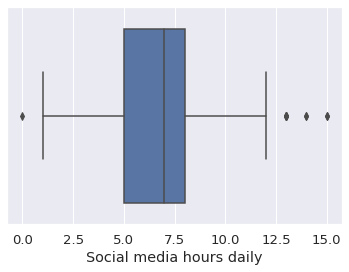

In [14]:
# daily hours on social media

social_arr = df['1. Social media hours daily']

# finding the 1st quartile
q1 = np.quantile(social_arr, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(social_arr, 0.75)
med = np.median(social_arr)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print("IQR:", iqr, "\nUpper bound: ",upper_bound, "\nLower bound: ",lower_bound)

# find the value of outliers
lower_outliers = social_arr[social_arr < lower_bound]
higher_outliers = social_arr[social_arr > upper_bound]
print("\nLower outliers: \n", lower_outliers, "\n\nHigher outliers: \n" , higher_outliers)

social_box = sns.boxplot(x = '1. Social media hours daily', data = df)
plt.xlabel('Social media hours daily')
plt.show()

The distribution of Hours of Social Media Use Daily has an interquartile range of 3.0 hours, with an upper bound of 12.5 hours and lower bound of 0.5 hours. There are 11 outliers in total, with 1 lower outlier of 0 hours and 10 higher outliers with a mean of 13.6 hours. 0 hours indicates that this person does not use social media and more than 13 hours indicates a higher amount of usage. As all the outliers are still within the reasonable range (0 hours to 24 hours), we include all of them in our data analysis.

### b. Hours of TV Use Daily

IQR: 1.0 
Upper bound:  3.5 
Lower bound:  -0.5

Higher outliers: 
 5      10
28      5
35      6
47      5
50      4
55      4
65      6
68      4
76      4
80      4
101     4
103     5
105     4
107     4
123     6
128     4
141     8
160     5
183     5
189     8
191     5
229     4
232     4
244     4
248     4
260     5
276     7
279     5
281     8
292     5
303     8
308     4
317     5
324     4
330    12
358     6
364     4
390     6
395     4
396     5
399     5
406     4
420     4
Name: 2. TV hours daily, dtype: int64


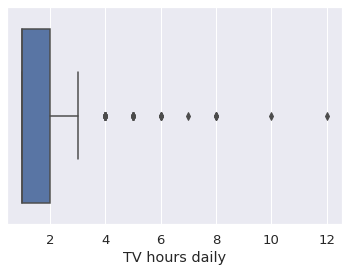

In [15]:
# daily hours on TV

tv_arr = df['2. TV hours daily']

# finding the 1st quartile
q1 = np.quantile(tv_arr, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(tv_arr, 0.75)
med = np.median(tv_arr)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print("IQR:", iqr, "\nUpper bound: ",upper_bound, "\nLower bound: ",lower_bound)

# finding the value of outliers
higher_outliers = tv_arr[tv_arr > upper_bound]
print("\nHigher outliers: \n" , higher_outliers)

tv_box = sns.boxplot(x = '2. TV hours daily', data = df)
plt.xlabel('TV hours daily')
plt.show()

The distribution of Hours of TV Use Daily has an interquartile range of 1.0 hours, with an upper bound of 3.5 hours and lower bound of -0.5 hours. This indicates a small variation of the data, with majority of the usage under 3.5 hours. Based on the previous analysis, the distribution of Hours of TV Use Daily is extremely right skewed. Thus, all 43 outliers are higher outliers with a average of 5.3 hours, which are considered longer TV use. There are 2 data points that are large: 10 hours and 12 hours. However as all outliers are within the reasonable range (between 0 hours and 24 hours), we decide to keep all outliers in our data analysis.

### c. Warwick-Edinburgh Score

IQR: 11.0 
Upper bound:  73.5 
Lower bound:  29.5

Lower outliers: 
 5      26
13     24
100    19
113    28
212    26
330    24
331    23
416    24
Name: Warwick-Edinburgh Score, dtype: int64


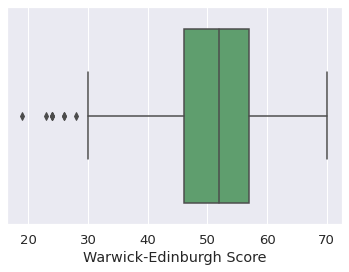

In [16]:
# Warwick-Edinburgh Score

arr1 = numerical_scored_df['Warwick-Edinburgh Score']

# finding the 1st quartile
q1 = np.quantile(arr1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(arr1, 0.75)
med = np.median(arr1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print("IQR:", iqr, "\nUpper bound: ",upper_bound, "\nLower bound: ",lower_bound)

# finding the value of outliers
lower_outliers = arr1[arr1 < lower_bound]
print("\nLower outliers: \n", lower_outliers)

warwick_box = sns.boxplot(x = "Warwick-Edinburgh Score", data = numerical_scored_df, color = 'g')

The distribution of Warwick-Edinburgh Score has an interquartile range of 11.0, with an upper bound of 73.5 and lower bound of 29.5. All 8 outliers are lower outliers with a average of 24.25, which indicate that these 8 people have particularly poorer mental well-beings compared to the entire sample. However, as all outliers are within the reasonable range (between score of 14 and 70), we decide to keep all outliers in our data analysis.

### d. Beck's Anxiety Score

IQR: 13.0 
Upper bound:  37.5 
Lower bound:  -14.5

Higher outliers: 
 5      38
6      39
74     39
77     38
80     39
96     44
104    40
213    48
248    39
266    40
312    47
313    41
323    45
331    46
345    42
392    47
399    41
415    45
425    47
Name: Becks Anxiety Score, dtype: int64


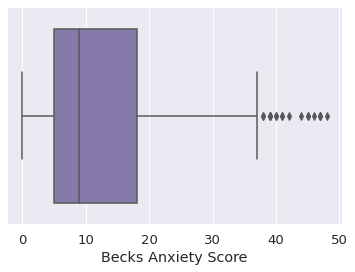

In [17]:
# Beck's Anxiety Score

arr2 = numerical_scored_df['Becks Anxiety Score']

# finding the 1st quartile
q1 = np.quantile(arr2, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(arr2, 0.75)
med = np.median(arr2)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print("IQR:", iqr, "\nUpper bound: ",upper_bound, "\nLower bound: ",lower_bound)

# finding the value of outliers
higher_outliers = arr2[arr2 > upper_bound]
print("\nHigher outliers: \n" , higher_outliers)

becks_box = sns.boxplot(x = "Becks Anxiety Score", data = numerical_scored_df, color = 'm')

The distribution of Beck's Anxiety Score has an interquartile range of 13.0, with an upper bound of 37.5 and lower bound of -14.5. All 19 outliers are higher outliers with a average of 42.4, which indicate that these 19 people have particularly higher level of anxiety compared to the entire sample. However, as all outliers are within the reasonable range (between score of 0 and 63), we decide to keep all outliers in our data analysis.

## 3. Relationship between Variables

### a. Warwick-Edinburgh Score vs Beck's Anxiety Score

[70, 46]

[23, 0]

[70, 48]

[19, 0]

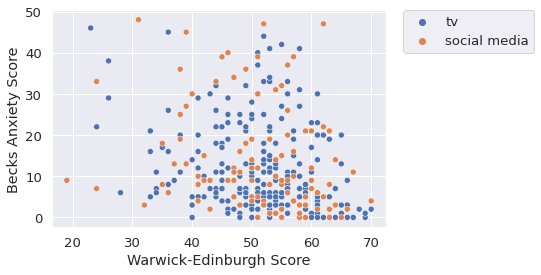

In [18]:
numerical_scored_df['Media Used for General News'] = df.iloc[:, [6]]['3. Preferred media for news in general']

significant = ['tv', 'social media']

tv_df = numerical_scored_df[numerical_scored_df['Media Used for General News'] == 'tv']
sm_df = numerical_scored_df[numerical_scored_df['Media Used for General News'] == 'social media']

combined = pd.concat([tv_df, sm_df]).reset_index(drop=True)
combined['Media Used for General News'].unique()

sns.scatterplot(x='Warwick-Edinburgh Score', y='Becks Anxiety Score' , data=combined, hue='Media Used for General News')
tv_max_outliers = [max(tv_df['Warwick-Edinburgh Score']), max(tv_df['Becks Anxiety Score'])]
tv_min_outliers = [min(tv_df['Warwick-Edinburgh Score']), min(tv_df['Becks Anxiety Score'])]

sm_max_outliers = [max(sm_df['Warwick-Edinburgh Score']), max(sm_df['Becks Anxiety Score'])]
sm_min_outliers = [min(sm_df['Warwick-Edinburgh Score']), min(sm_df['Becks Anxiety Score'])]


display(tv_max_outliers, tv_min_outliers, sm_max_outliers, sm_min_outliers)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

This relationship was run to validate the inherent inverse correlation shared between the scores. For both social media and TV usage for general news consumption, people with greater mental health scores (indicating better mental health) had a lower anxiety score (indicating less anxiety) and vice-versa.

### b. Social Media Hours vs Mental Health Scores

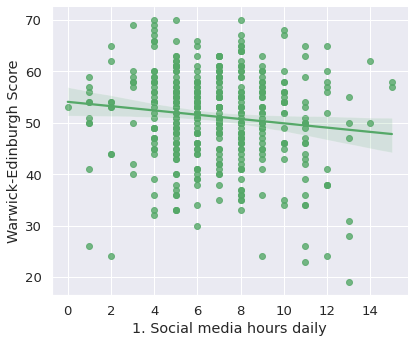

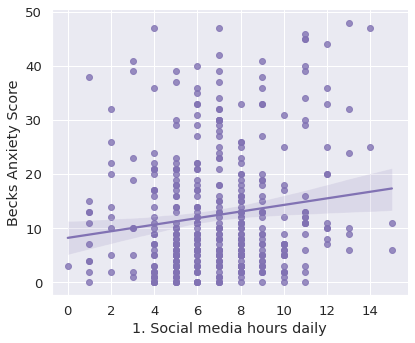

In [19]:
# Social Media hours vs Warwick-Edinburgh Score
sns.lmplot(
    x = "1. Social media hours daily",
    y = "Warwick-Edinburgh Score",
    data = numerical_scored_df,
    aspect = 1.2,
    height = 5,
    scatter_kws = {'color': 'g'},
    line_kws = {'color': 'g'}
)

# Social Media hours vs Becks Anxiety Score
sns.lmplot(
    x = "1. Social media hours daily",
    y = "Becks Anxiety Score",
    data = numerical_scored_df,
    aspect = 1.2,
    height = 5,
    scatter_kws = {'color': 'm'},
    line_kws = {'color': 'm'}
)

When looking at social media hours vs both mental health scores, it seems to not have any linear relationship. In addition, there seems to be little-to-no correlation.

### c. TV Hours vs. Mental Health Scores

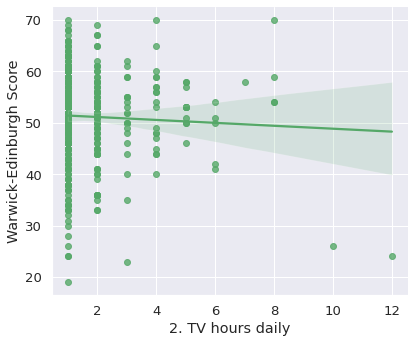

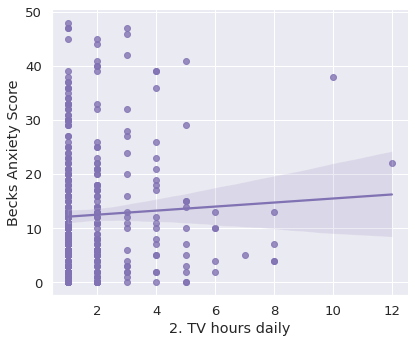

In [20]:
# TV used hours vs Warwick-Edinburgh Score
sns.lmplot(
    x = "2. TV hours daily",
    y = "Warwick-Edinburgh Score",
    data = numerical_scored_df,
    aspect = 1.2,
    height = 5,
    scatter_kws = {'color': 'g'},
    line_kws = {'color': 'g'}
)

# TV used hours vs Becks Anxiety Score
sns.lmplot(
    x = "2. TV hours daily",
    y = "Becks Anxiety Score",
    data = numerical_scored_df,
    aspect = 1.2,
    height = 5,
    scatter_kws = {'color': 'm'},
    line_kws = {'color': 'm'}
)

When looking at TV hours vs both mental health scores, once again, there seem to not have any linear relationship. In addition, there seem to be little to non correlation. Seeing no signs of linearity and possibility of heteroscedasticity, assumption of linear regression is not met.

### d. Preferred Media Use vs Mental Health Scores

In [21]:
numerical_scored_df['Media Used for General News'] = df.iloc[:, [6]]['3. Preferred media for news in general']

tv_df = numerical_scored_df[numerical_scored_df['Media Used for General News'] == 'tv']
sm_df = numerical_scored_df[numerical_scored_df['Media Used for General News'] == 'social media']

#Run a ttest to see the difference between the two distributions (social media and TV usage hours)
tv_df_we = tv_df['Warwick-Edinburgh Score']
tv_df_ba = tv_df['Becks Anxiety Score']

sm_df_we = sm_df['Warwick-Edinburgh Score']
sm_df_ba = sm_df['Becks Anxiety Score']

#ttest for Warwick-Edinburgh Score
t_val_we, p_val_we = stats.ttest_ind(a=tv_df_we, b=sm_df_we)
display(t_val_we, p_val_we)

if p_val_we < 0.05:
    print('There is a significant difference.')
else:
    print('There is NOT a significant difference.')

#ttest for the Becks-Anxiety Score
t_val_ba, p_val_ba = stats.ttest_ind(a=tv_df_ba, b=sm_df_ba)
display(t_val_ba, p_val_ba)

if p_val_ba < 0.05:
    print('There is a significant difference.')
else:
    print('There is NOT a significant difference.')

0.6195630439932948

0.53595803399194

There is NOT a significant difference.


-1.5401914335371092

0.12443840075017727

There is NOT a significant difference.


For both the Warwick-Edinburgh Score and Beck's Anxiety Score, there is no significant difference in the distributions between social media hours and TV hours.

### e. Age vs Mental Health Scores

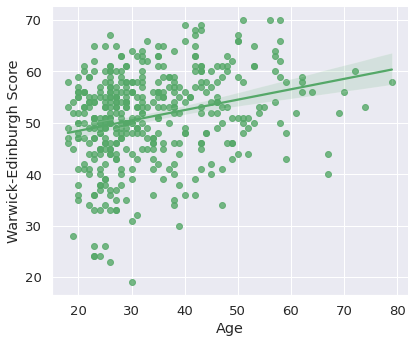

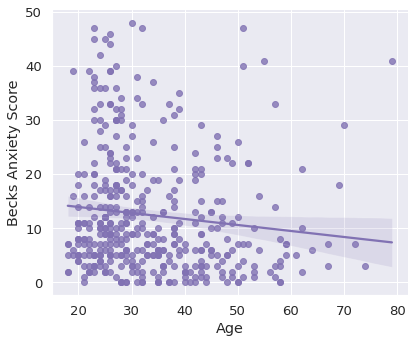

In [22]:
# Age vs Warwick-Edinburgh Score
sns.lmplot(
    x = "Age",
    y = "Warwick-Edinburgh Score",
    data = numerical_scored_df,
    aspect = 1.2,
    size = 5,
    scatter_kws = {'color': 'g'},
    line_kws = {'color': 'g'}
)

#Age vs Becks Anxiety Score
sns.lmplot(
    x = "Age",
    y = "Becks Anxiety Score",
    data = numerical_scored_df,
    aspect = 1.2,
    size = 5,
    scatter_kws = {'color': 'm'},
    line_kws = {'color': 'm'}
)

Age vs mental health scores seems to provide some kind of relationship, possibly a logistic relationship. However, the correlation does not seem to be strong.

## 4. Multilinear Regression Model

In [23]:
# code here setting up

# turn things into dummies
ps = pd.get_dummies(df['Sex'])
pq = pd.get_dummies(df['Qualifications'])
ph = pd.get_dummies(df['Habitat'])

numerical_df = pd.concat([df.select_dtypes(['number']), ps, pq, ph], axis=1).reset_index()
numerical_df.head(10)

# Add all X predictors
#numerical_scored_df = numerical_df.iloc[:,:7]
numerical_scored_df = numerical_df.drop(numerical_df.iloc[:, 8:43], inplace=False, axis=1)

# Add summed Y score into dataframe
numerical_scored_df["Warwick-Edinburgh Score"] = numerical_df.iloc[:,8:22].sum(axis=1)
numerical_scored_df["Becks Anxiety Score"] = numerical_df.iloc[:,21:43].sum(axis=1)

# Rename the columns

numerical_scored_df = numerical_scored_df.rename(columns = {'Metropolitan City   ':"Metropolitan City", 
                                             'Rural               ':"Rural", 
                                             'Male  ': 'Male'})

### a. Warwick-Edinburgh Score

In [24]:
outcome3, predictors3 = patsy.dmatrices('Q("Warwick-Edinburgh Score") ~ Age + Q("1. Social media hours daily") + Q("2. TV hours daily")', numerical_scored_df)
model3 = sm.OLS(outcome3, predictors3)
result3 = model3.fit()
print(result3.summary2())

                        Results: Ordinary least squares
Model:                OLS                          Adj. R-squared:     0.074    
Dependent Variable:   Q("Warwick-Edinburgh Score") AIC:                3042.6847
Date:                 2021-12-10 21:19             BIC:                3058.9024
No. Observations:     426                          Log-Likelihood:     -1517.3  
Df Model:             3                            F-statistic:        12.36    
Df Residuals:         422                          Prob (F-statistic): 9.17e-08 
R-squared:            0.081                        Scale:              73.349   
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                        48.9694   2.2900 21.3837 0.0000 44.4681 53.4707
Age                               0.1831   0.0373  4.

For the Warwick-Edinburgh Score, multilinear analysis performed on all the variables yielded significance in some: Age, social media hours daily and TV hours daily. 

Age is positively correlated with score (intercept of 0.1831), while social media hours and TV hours daily are negatively correlated (-0.4048, -0.6489).

Note that there is a very low correlation between Warwick-Edinburgh Score and these variables (according to adjusted R-squared score, only 7.4% of the variation in Warwick-Edinburgh Score can be explained by Age, Social media hours daily, and TV hours daily.)

### b. Beck's Anxiety Score

In [25]:
outcome4, predictors4 = patsy.dmatrices('Q("Becks Anxiety Score") ~ Q("1. Social media hours daily") + Q("2. TV hours daily") + Q("8. Have you posted covid info on social media without verifying facts") + Q("Female") + Q("Rural")', numerical_scored_df)
model4 = sm.OLS(outcome4, predictors4)
result4 = model4.fit()
print(result4.summary2())

                                            Results: Ordinary least squares
Model:                             OLS                                     Adj. R-squared:                    0.093    
Dependent Variable:                Q("Becks Anxiety Score")                AIC:                               3214.5210
Date:                              2021-12-10 21:19                        BIC:                               3238.8476
No. Observations:                  426                                     Log-Likelihood:                    -1601.3  
Df Model:                          5                                       F-statistic:                       9.670    
Df Residuals:                      420                                     Prob (F-statistic):                9.41e-09 
R-squared:                         0.103                                   Scale:                             109.29   
------------------------------------------------------------------------------------

For the Beck's Anxiety Score, multilinear analysis performed on all the variables yield significance in the following: social media hours daily, TV hours daily, Q8. Have you posted covid info on social media without verifying facts, gender (female), and habitat (rural).

All the variables seems to be positivly correlated with Beck's Anxiety Score. Since Question 8 (Have you posted covid info on social media without verifying fact and gender column have 2 options (0=No, 1=Yes for question 8; 0=Male, 1=Female for gender), answering Yes to question 8 may increase the Beck's Anxiety score, and female participants may also seem to have a higher score. Habitat is coded as a dummy variable with 1=Rural and 0=Others, of which participants living at Rural areas seem to have higher Beck's Anxiety scores.

Note that there is a very low correlation between Becks Anxiety Score and these variables as well (according to adjusted R-squared score, only 9% of the variation in Beck's Anxiety Score can be explained by these variables!)

# Ethics & Privacy

The data were gathered from the existing datasets in the empirical studies. The data gathering process required information about people’s mental health and stability which could be very personal. Thus, to ensure the consent of the people whose data have been collected, we checked the method section of the studies for the consenting procedure. To minimize the possible privacy issues, we used indexes or unique id numbers to refer to the individual data points and only analyze the parts that were relevant to the research hypothesis. Also, if a location variable is required, we also maximized the privacy of individual participants by classifying the city participants lived in into a habitat category (Urban Area, Metropolitan City, Rural Area).

Our research question is ethical as we aim to explore the relationship between media usage and mental health, which is not required to put the subject under risk but the result can improve our understanding towards media usage and mental health conditions during the COVID pandemic.

To avoid possible biases in the data, we choose the sample that covers a wide range of age groups, different habitats and different educational levels. However, we still acknowledge that as the data collected might be limited to participants in India, the generalization of our conclusion might be limited. We are aware of the cultural differences due to race and political background of different regions, which can affect how people perceive certain types of news or media posts. Also, as some categories in the sample have smaller sample size (e.g. rural area and PhD/M.Phil), we should be careful on making inferences based on the findings related to those categories.

To minimize the researcher biases, we analyzed the data collaboratively by having every group member approach the question in different ways, communicating the results and selecting the best methods/models we found. 

# Conclusion & Discussion

In our project, we explored how mental health, specifically mental well-being and anxiety, correlated with social media usage and TV usage, mediated by demographic information and attitudes towards social media. Looking at the final multivariate linear regression model, comparing social media and TV hours against mental health scores with several demographic variables factored in, we see that both daily social media usage and TV watch time have a significant but slight negative correlation with the Warwick-Edinburgh score. Since a lower Warwick-Edinburgh score indicates decreased well-being, this means that higher media usage times in general result in decreased well-being. Similarly, daily social media and TV usage hours are positively correlated with the Beck’s Anxiety score, and since a higher Beck’s anxiety score indicates higher mental anxiety, this again means that higher media usage times result in increased anxiety. 

Therefore, these results show that our initial hypothesis was incorrect; even though social media was one of few ways of communication among friends and family during COVID lockdowns, more time spent on social media was still correlated with poor mental health. One possible explanation for this is that since most social media platforms are used not only for communication but also acquiring news, any potential benefits of social interaction are negated by the constant barrage of negative COVID-related news. This explanation is also supported by slightly higher correlation coefficients for tv hours relative to social media hours when compared with the two mental health scores. 

Some limitations of the analysis include the dataset being too small. With more data, we could have divided social media platforms into communication-only apps like Whatsapp, Messenger, and news-based apps like Facebook in order to further test whether the negative relationship we found between social media and mental health scores was a result of the detrimental effects of increased news consumption balancing out positive effects of social interaction. Furthermore, the variables explained (R-squared) across all the analyses are small. This suggests that variables like media usage, attitudes and demographic information cannot fully account for the variability in mental health conditions of the individuals. Even though there are significant correlations between media usage and mental health, the causal inferences based on the results are limited. 

Overall, through the exploration, our project shed light on the cognitive impacts of media usage during the COVID-19 pandemic and how factors like gender, age, and habitat can mediate such impacts. These results can provide a basis for future research to dig into the topics like cognitive consequences of certain media types and susceptibility of different cohorts to those impacts.

# Team Contributions

- **Overview:** Yu
- **Research Question, Hypothesis:** all (Changchen, Jason, Sanjay, Victor, Yu)
- **Background & Prior Work:** all
- **Ethics & Privacy:** Changchen, Yu
- **Dataset, Setup, Data Cleaning:** all
- **Data Analysis & Results:** all
- **Conclusion & Discussion:** Changchen, Yu